In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train_clean_new_columns.csv')

In [3]:
from sklearn.decomposition import PCA

In [4]:
#Insert SKLearn Metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [5]:
import numpy as np

In [6]:
#Create Indicators

train_labels = np.array(list(data[data['target'].notnull()]['target'].astype(np.uint8)))

In [7]:
#Create Train Set, drop strings / labels

train_set = data[data['target'].notnull()].drop(columns = ['household_id', 'id', 'target'])

In [8]:
#Scale Data

features = list(train_set.columns)

pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])

train_set = pipeline.fit_transform(train_set)

In [9]:
#Create F1 Score

scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [10]:
#Import Models SK_Learn

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

#Source: https://github.com/WillKoehrsen/data-science-for-good/blob/master/costa-rican-poverty/A%20Complete%20Walkthrough.ipynb

In [11]:
#Balance Data - Install

from collections import Counter

from imblearn.over_sampling import SMOTE

In [12]:
#Balance Data, and verify our new tables are balanced

#print('Original dataset shape %s' % Counter(np.ravel(train_labels)))

#sm = SMOTE(random_state=42)

#X_res, y_res = sm.fit_resample(train_set, np.ravel(train_labels))

#print('Resampled dataset shape %s' % Counter(y_res))

In [19]:
X_res = train_set
y_res = train_labels

In [20]:
#Function to loop through model types

model_results_balanced = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results_balanced=None):
    """Perform 10 fold cross validation of a model"""

    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results_balanced is not None:
        model_results_balanced = model_results_balanced.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results_balanced

In [21]:
#balanced Linear Support Vector Classiciation

model_results_balanced = cv_model(X_res, y_res, LinearSVC(), 
                         'LSVC', model_results_balanced)

10 Fold CV Score: 0.31944 with std: 0.02662


In [22]:
#balanced Gaussian Naive Bayes

model_results_balanced = cv_model(X_res, y_res, 
                         GaussianNB(), 'GNB', model_results_balanced)

10 Fold CV Score: 0.12236 with std: 0.02068


In [23]:
#balanced Neural Network Multi Layer Perceptor

#model_results_balanced = cv_model(X_res, y_res, 
#                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
#                         'MLP', model_results_balanced)

In [24]:
#balanced LDA

model_results_balanced = cv_model(X_res, y_res, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results_balanced)

10 Fold CV Score: 0.38424 with std: 0.04554


In [25]:
#balanced Ridge

model_results_balanced = cv_model(X_res, y_res, 
                         RidgeClassifierCV(), 'RIDGE', model_results_balanced)

10 Fold CV Score: 0.28913 with std: 0.01991


In [26]:
#balanced K Nearest Neighbors

for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results_balanced = cv_model(X_res, y_res, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results_balanced)


KNN with 5 neighbors

10 Fold CV Score: 0.30498 with std: 0.02507

KNN with 10 neighbors

10 Fold CV Score: 0.27719 with std: 0.02537

KNN with 20 neighbors

10 Fold CV Score: 0.26682 with std: 0.0169


In [27]:
#balanced Random Forest

model_results_balanced = cv_model(X_res, y_res,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results_balanced)

10 Fold CV Score: 0.32516 with std: 0.02779


In [28]:
#import visulization programs

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#move row name to columns

model_results_balanced.index.name = 'model'
model_results_balanced.reset_index(inplace=True)

ValueError: cannot insert model, already exists

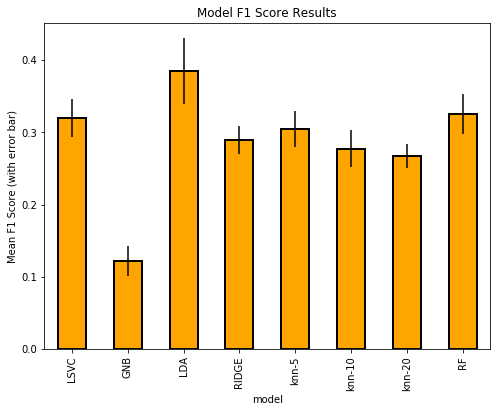

In [30]:
#Create F-1 Score Bar Chart

model_results_balanced.set_index('model', inplace = True)
model_results_balanced['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results_balanced['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');

In [30]:
#Results in table view

print(model_results_balanced)

         cv_mean    cv_std
model                     
LSVC    0.529661  0.021106
GNB     0.201345  0.014327
MLP     0.898547  0.027286
LDA     0.539673  0.020975
RIDGE   0.525709  0.018382
knn-5   0.817741  0.019335
knn-10  0.759778  0.024326
knn-20  0.673795  0.043226
RF      0.912460  0.074239


In [16]:
from sklearn.cluster import KMeans

In [17]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_res)

In [18]:
principalComponents

array([[-0.78135212,  0.29538817, -1.2086385 , ...,  0.19812488,
         0.28303059, -0.00846158],
       [ 1.22024886,  0.492539  , -0.29110109, ...,  0.35440367,
         0.09549604, -0.44947896],
       [ 1.58128179,  0.73844152, -0.73658814, ...,  0.80148895,
         0.07047197,  0.32308384],
       ...,
       [ 0.33412913, -0.76597077, -0.46736416, ..., -0.12540945,
         0.22859818,  1.12208967],
       [-1.26962473,  0.90568518,  0.13856268, ...,  0.10676063,
        -0.11367622,  0.15835081],
       [ 0.20773117, -0.16851781,  1.58970865, ...,  0.3153109 ,
         0.01127537,  0.01765732]])

In [20]:
import matplotlib.pyplot as plt

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

([<matplotlib.axis.XTick at 0x2a1dc15e3c8>,
 <a list of 20 Text xticklabel objects>)

In [21]:
features

range(0, 20)

<BarContainer object of 20 artists>

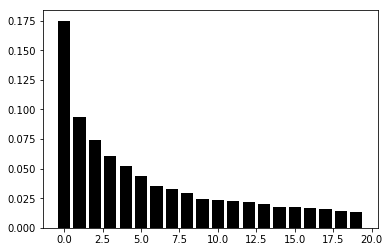

In [22]:
plt.bar(features, pca.explained_variance_ratio_, color='black')

In [23]:
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

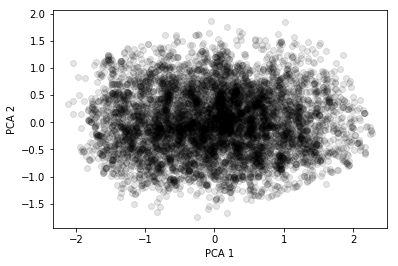

In [31]:
plt.scatter(PCA_components[1], PCA_components[0], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

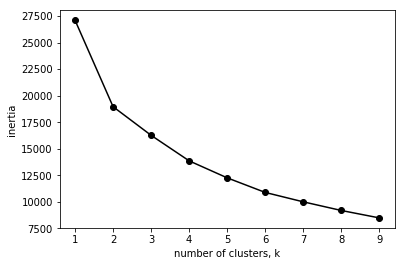

In [26]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:5])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()